http://stackoverflow.com/questions/32589636/with-seaborn-facetgrid-how-do-i-specify-the-color-of-a-mapped-scatter-plot

In [16]:
import matplotlib as mpl
mpl.rcParams

RcParams({u'agg.path.chunksize': 0,
          u'animation.avconv_args': [],
          u'animation.avconv_path': u'avconv',
          u'animation.bitrate': -1,
          u'animation.codec': u'mpeg4',
          u'animation.convert_args': [],
          u'animation.convert_path': u'convert',
          u'animation.ffmpeg_args': [],
          u'animation.ffmpeg_path': u'ffmpeg',
          u'animation.frame_format': u'png',
          u'animation.mencoder_args': [],
          u'animation.mencoder_path': u'mencoder',
          u'animation.writer': u'ffmpeg',
          u'axes.axisbelow': True,
          u'axes.color_cycle': [(0.2980392156862745,
                                 0.4470588235294118,
                                 0.6901960784313725),
                                (0.3333333333333333,
                                 0.6588235294117647,
                                 0.40784313725490196),
                                (0.7686274509803922,
                                 0.

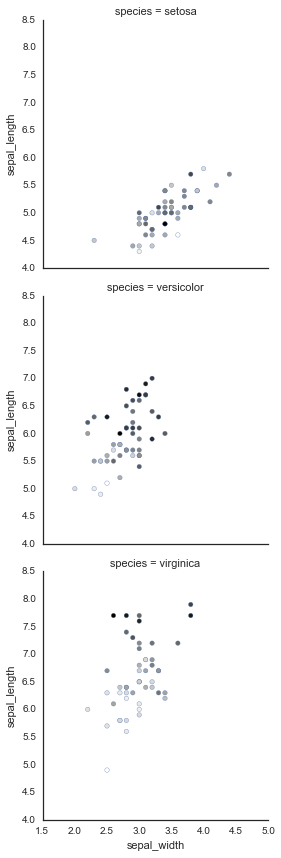

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white')

iris = sns.load_dataset('iris')
g = sns.FacetGrid(iris, row='species', size=4)
def scatter(x, y, c, **kwargs):
    plt.scatter(x, y, c=c, **kwargs)
g.map(scatter, 'sepal_width', 'sepal_length', 'petal_length')
# g.map(plt.scatter, iris.sepal_width, iris.sepal_length, c=iris.petal_length)
# g.map(plt.scatter, 'sepal_width', 'sepal_length', c=iris.petal_length)

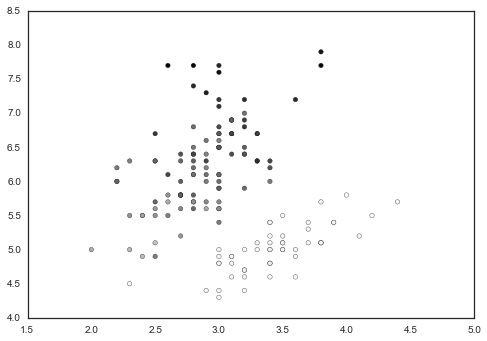

In [19]:
plt.scatter(iris.sepal_width, iris.sepal_length, c=iris.petal_length)

### Colorbar in facetgrid
Seemed to be related, but I could not get it to work. https://github.com/mwaskom/seaborn/issues/582

In [25]:
g = sns.FacetGrid(df, col='s')

def contourplot(*args, **kwargs):

    data = kwargs.pop("data").pivot(args[1], args[0])[args[2]]
    X, Y = np.meshgrid(data.columns, data.index)
    ax = plt.gca()
    mappable = ax.contourf(X, Y, data, *args[3:], **kwargs)
    ax.figure.colorbar(mappable)

g.map_dataframe(contourplot, 'x', 'y', 'value', 5)

NameError: name 'df' is not defined

In [24]:
import numpy as np
import pandas
import seaborn as sns

x, y = np.meshgrid(np.linspace(0, 100), np.linspace(0, 100))

df = pandas.DataFrame(dict(
       x=r_[x.ravel(), x.ravel()],
       y=r_[y.ravel(), y.ravel()],
       s=r_[
           np.ones_like(x.ravel()),
           np.ones_like(x.ravel()) * 10
       ]
))

df['value'] = (
   df.x *
   exp(-((df.x - df.y) ** 2 / df.s ** 2))
)

g = sns.FacetGrid(df, col='s')

def data_frame_to_matrix(fn):
   def dummy(*args, **kwargs):
       data_ = kwargs['data']
       kwargs_ = kwargs.copy()
       del kwargs_['data']
       del kwargs_['color']
       data_ = data_.pivot(args[1], args[0])[args[2]]
       X, Y = meshgrid(data_.columns, data_.index)
       return fn(X, Y, data_, *args[3:], **kwargs_)
   return dummy

g.map_dataframe(
   data_frame_to_matrix(contourf),
   'x', 'y', 'value', 5,
)

NameError: name 'r_' is not defined